In [182]:
from simulation_toykit_kspace import *
import numpy as np
degree = np.pi/180

In [183]:
wavelength = 13
NA         = 0.9
M          = 2
pitch      = 26
chief_theta= 60
theta      = chief_theta
chief_phi  = 45
phi        = chief_phi
NA_illum   = NA*2
sigma_out  = 0.8

# phi        = 0
k0               = kspace.k0(wavelength)
k_pupil          = (np.real(kspace.k(wavelength, NA) / M))
k_illum          = (np.real(kspace.k(wavelength, NA_illum) / M))

sigma_chief_ray  = kspace.theta_phi_to_sigma_xy(theta * degree, phi * degree)
chief_ray_center = [s * k0 for s in sigma_chief_ray]

RESET = "\033[0m"
BOLD = "\033[1m"
GREEN = "\033[32m"
BLUE = "\033[34m"

In [184]:
illum_left, illum_right, illum_top, illum_down = [-sigma_out, 0], [sigma_out, 0], [0, sigma_out], [0, -sigma_out]
illum_center_k = chief_ray_center
print(f"{GREEN}illum info in k-space{RESET}")
print(f"    illum center\t{illum_center_k}")
print(f"    illum left boundary\t{[k_illum * sigma_illum * -1 + k_offset for k_offset, sigma_illum in zip(illum_center_k, illum_right)]}")
print(f"    illum right boundary{[k_illum * sigma_illum* -1+ k_offset  for k_offset, sigma_illum in zip(illum_center_k, illum_left)]}")
print(f"    illum top boundary\t{[k_illum * sigma_illum*  -1+ k_offset  for k_offset, sigma_illum in zip(illum_center_k, illum_down)]}")
print(f"    illum down boundary\t{[k_illum * sigma_illum* -1+ k_offset for k_offset, sigma_illum in zip(illum_center_k, illum_top)]}")

test_point       = [0.5, 0.5]
illum_point      = [-s for s in test_point]  # sigma wafer to sigma mask
illum_point_k_vec = [k_illum * sigma + k_offset for k_offset, sigma in zip(illum_center_k, illum_point)]
print(f"    chief_ray_center={chief_ray_center} illum_point={illum_point} k-vector{illum_point_k_vec}")

test_point_in_wafer = [s * NA_illum/NA for s in test_point]
print(f"    sigmaxy in wafer={test_point_in_wafer}")


illum info in k-space
    illum center	[0.29597303772966094, 0.2959730377296609]
    illum left boundary	[-0.052018763898746934, 0.2959730377296609]
    illum right boundary[0.6439648393580688, 0.2959730377296609]
    illum top boundary	[0.29597303772966094, 0.6439648393580688]
    illum down boundary	[0.29597303772966094, -0.05201876389874699]
    chief_ray_center=[0.29597303772966094, 0.2959730377296609] illum_point=[-0.5, -0.5] k-vector[0.07847816171190602, 0.07847816171190597]
    sigmaxy in wafer=[1.0, 1.0]


In [185]:
nf_left, nf_right, nf_top, nf_down = [-1, 0], [1, 0], [0, 1], [0, -1]
pupil_center_k = chief_ray_center
print(f"{BLUE}pupil info in k-space{RESET}")
print(f"    pupil center\t{pupil_center_k}")
print(f"    pupil left boundary\t{[k_pupil*sigma + k_offset for k_offset, sigma in zip(pupil_center_k, nf_left)]}")
print(f"    pupil right boundary{[k_pupil*sigma + k_offset  for k_offset, sigma in zip(pupil_center_k, nf_right)]}")
print(f"    pupil top boundary\t{[k_pupil*sigma + k_offset  for k_offset, sigma in zip(pupil_center_k, nf_top)]}")
print(f"    pupil down boundary\t{[k_pupil*sigma + k_offset for k_offset, sigma in zip(pupil_center_k, nf_down)]}")

pupil info in k-space
    pupil center	[0.29597303772966094, 0.2959730377296609]
    pupil left boundary	[0.07847816171190602, 0.2959730377296609]
    pupil right boundary[0.5134679137474158, 0.2959730377296609]
    pupil top boundary	[0.29597303772966094, 0.5134679137474158]
    pupil down boundary	[0.29597303772966094, 0.07847816171190597]


In [186]:
nf_left, nf_right, nf_top, nf_down = [-1, 0], [1, 0], [0, 1], [0, -1]
propagating_center_k = [0, 0]
k_propagating = k0
print(f"{BOLD}propagating info in k-space{RESET}")
print(f"    propagating center\t\t{propagating_center_k}")
print(f"    propagating left boundary\t{[k_propagating * sigma + k_offset for k_offset, sigma in zip(propagating_center_k, nf_left)]}")
print(f"    propagating right boundary\t{[k_propagating * sigma + k_offset for k_offset, sigma in zip(propagating_center_k, nf_right)]}")
print(f"    propagating top boundary\t{[k_propagating * sigma + k_offset for k_offset, sigma in zip(propagating_center_k, nf_top)]}")
print(f"    propagating down boundary\t{[k_propagating * sigma + k_offset for k_offset, sigma in zip(propagating_center_k, nf_down)]}")

propagating info in k-space
    propagating center		[0, 0]
    propagating left boundary	[-0.483321946706122, 0.0]
    propagating right boundary	[0.483321946706122, 0.0]
    propagating top boundary	[0.0, 0.483321946706122]
    propagating down boundary	[0.0, -0.483321946706122]


In [187]:
# step in hyperlith
sigma_step = (wavelength / pitch) * (1 / NA) 
print(f"sigma_step\t={sigma_step}")
k_step_in_mask  = sigma_step * k_pupil
print(f"k_step_in_mask\t={k_step_in_mask}") 
print(f"k_step_in_wafer\t={k_step_in_mask * M}") 

sigma_step	=0.5555555555555556
k_step_in_mask	=0.12083048667653051
k_step_in_wafer	=0.24166097335306103


In [188]:
def c_matrix_to_ndarray(m):
    return np.array([[ c for c in r] for r in m])
# 仿真 test_point 偏振态
# test_point_sigmaxy = [k/k0 for k in  illum_center_k]
test_k = [k0/2,k0/2]
test_k = [0,0]
test_k = [0, illum_center_k[1]]
# test_k = [0.1, -0.1]
# test_k = [0.41, 0.22]
test_point_sigmaxy = [(k-center)/k0 for center,k in  zip(illum_center_k, test_k)]
print(test_point_sigmaxy, illum_center_k, test_k)
angles = kspace.sigma_xy_to_theta_phi(*test_point_sigmaxy)
theta, phi = angles
print(f"k={illum_center_k},theta,phi={[a/degree for a in angles]}")

m0 = kspace.rotate_matrix(*angles)
m1 = kspace.rotate_matrix_v1(*angles)
print(m0)
print(m1)

a = c_matrix_to_ndarray(m0)
b = c_matrix_to_ndarray(m1)
a = np.transpose(a)
print(a-b)


roate_matrix = c_matrix_to_ndarray(kspace.rotate_matrix_v1(theta, phi))
TM_basis = roate_matrix@np.array([1,0,0]) 
# roate_matrix = c_matrix_to_ndarray(kspace.rotate_matrix(theta, phi + 0.5*np.pi))
TE_basis = roate_matrix@np.array([0,1,0])
print(TE_basis)
print(TM_basis)

[-0.6123724356957946, 0.0] [0.29597303772966094, 0.2959730377296609] [0, 0.2959730377296609]
k=[0.29597303772966094, 0.2959730377296609],theta,phi=[37.761243907035045, 180.0]
[[-0.790569,-1.22465e-16,-0.612372],[9.68168e-17,-1,7.4994e-17],[-0.612372,0,0.790569]]
[[-0.790569,9.68168e-17,-0.612372],[-1.22465e-16,-1,0],[-0.612372,7.4994e-17,0.790569]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[ 9.68168304e-17 -1.00000000e+00  7.49939943e-17]
[-7.90569415e-01 -1.22464680e-16 -6.12372436e-01]


In [189]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def plot_line(ax, color, center_list, basis_list, magnitude_list, label_list=None):
    """
    在 ax 上绘制线段。
    逻辑：输入坐标和向量 -> 归一化方向 -> 乘以长度 -> 投影到XY平面 -> 绘制以Center为中点的线段
    """
    # 确保输入是列表，方便统一处理（兼容单个输入的情况，如果调用方保证是list则不需要）
    # 这里假设调用方传入的都是 list 结构
    
    for i in range(len(center_list)):
        P = np.array(center_list[i])
        V_direction = np.array(basis_list[i])
        magnitude = magnitude_list[i]
        
        # --- 保持原有逻辑 ---
        # 1. 归一化 (在原维度，通常是3D)
        norm_V = np.linalg.norm(V_direction)
        if norm_V == 0:
            continue # 防止除零
        V_unit = V_direction / norm_V
        
        # 2. 乘以指定长度
        V_scaled = V_unit * magnitude
        
        # 3. 只取 XY 平面分量
        P_xy = P[:2]
        V_xy = V_scaled[:2]
        
        # 4. 计算线段起点和终点 (从P点向两侧延伸一半长度)
        Start_V_xy = P_xy - V_xy / 2
        End_V_xy = P_xy + V_xy / 2
        # --------------------

        # 绘制线段
        ax.plot([Start_V_xy[0], End_V_xy[0]], 
                [Start_V_xy[1], End_V_xy[1]], 
                color=color, linestyle='-', linewidth=1, 
            )
        
        # 可选：绘制中心点，标记位置
        ax.plot(P_xy[0], P_xy[1], 'o', color=color, markersize=0.5)


def plot_ellipse(ax, color, center_list, basis_list, magnitude_list, ellipticity_list):
    """
    在 ax 上绘制椭圆。
    逻辑：基于基向量的方向确定旋转角度，基于magnitude确定长轴，基于ellipticity确定短轴。
    """
    for i in range(len(center_list)):
        P = np.array(center_list[i])
        V_direction = np.array(basis_list[i])
        magnitude = magnitude_list[i] * 2
        ellipticity = ellipticity_list[i]
        
        # 取 XY 平面坐标作为中心
        x, y = P[:2]
        
        # 计算旋转角度
        # 假设基向量在 XY 平面上的投影决定了椭圆的长轴方向
        V_xy = V_direction[:2]
        
        # 使用 arctan2 计算弧度，然后转为度数
        # 注意：如果 V_xy 为 [0,0]，角度可能无意义，这里做个简单的防错
        if np.linalg.norm(V_xy) > 0:
            current_dir_angle = np.arctan2(V_xy[1], V_xy[0])
        else:
            current_dir_angle = 0.0
            
        ellipse_angle_degrees = np.degrees(current_dir_angle)

        # 参考你提供的逻辑
        width_to_plot = magnitude  # 长轴长度 (User wants major axis length to be 'scala')
        height_to_plot = width_to_plot * abs(ellipticity) # 短轴长度

        # 创建椭圆对象
        ellipse = Ellipse(
            xy=(x, y),
            width=width_to_plot,
            height=height_to_plot,
            angle=ellipse_angle_degrees,
            facecolor='none',       # 空心
            edgecolor=color,        # 边框颜色
            linewidth=2,            # 对应 ellipse_linewidth
            alpha=1.0,              # 对应 ellipse_alpha
            zorder=1                # 图层顺序
        )
        
        ax.add_patch(ellipse)



[[ 0.35355339  0.35355339 -0.8660254 ]
 [-0.70710678  0.70710678  0.        ]
 [ 0.61237244  0.61237244  0.5       ]]


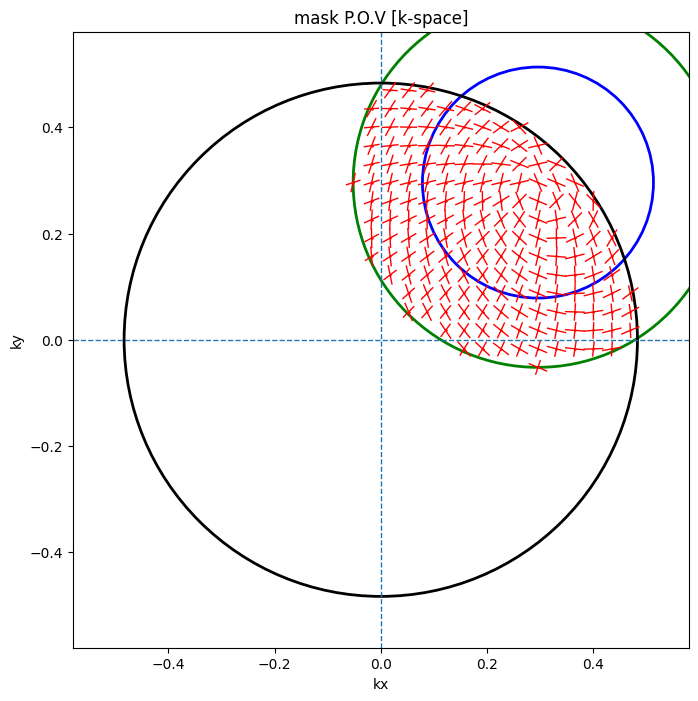

In [190]:
def plot_mask_pov():
    fig, ax1 = plt.subplots(figsize=(8, 8))
    plot_line(
        ax=ax1, 
        color='red', 
        center_list=center_list, 
        basis_list=basis_list, 
        magnitude_list=magnitude_list,
    )

    plot_ellipse(
        ax=ax1,
        color='green',
        center_list=[illum_center_k],
        basis_list=[[1,0]], 
        magnitude_list=[illum_radia],   
        ellipticity_list=[1] 
    )
    plot_ellipse(
        ax=ax1,
        color='blue',
        center_list=[pupil_center_k],
        basis_list=[[1,0]], 
        magnitude_list=[k_pupil],   
        ellipticity_list=[1] 
    )
    plot_ellipse(
        ax=ax1,
        color='black',
        center_list=[propagating_center_k],
        basis_list=[[1,0]], 
        magnitude_list=[k0],   
        ellipticity_list=[1] 
    )
    ax1.set_title('mask P.O.V [k-space]')
    ax1.set_xlabel('kx')
    ax1.set_ylabel('ky')  
    max_k = max([k0, k_illum, k_pupil])
    max_k = max_k * 1.2
    ax1.set_xlim(-max_k, max_k)
    ax1.set_ylim(-max_k, max_k)
    ax1.axhline(0, linestyle='--', linewidth=1)
    ax1.axvline(0, linestyle='--', linewidth=1)
    ax1.set_aspect('equal')
    plt.show()
def sample_points_in_circle(center, radius, half_size):
    x0, y0 = center
    x = np.linspace(-half_size, half_size, half_size*2 + 1)
    y = np.linspace(-half_size, half_size, half_size*2 + 1)
    step = radius / half_size
    x = x*step + x0
    y = y*step + y0
    xx, yy = np.meshgrid(x, y, indexing="xy")
    mask = (xx - x0)**2 + (yy - y0)**2 <= radius**2
    points = np.column_stack((xx[mask], yy[mask]))
    return points, step

def get_TE_TM(point):
    theta, phi = kspace.sigma_xy_to_theta_phi(*point)
    roate_matrix = c_matrix_to_ndarray(kspace.rotate_matrix_v1(theta, phi))
    # 为了获得每个方向正交基, 需要 transpose 一下
    roate_matrix = np.transpose(roate_matrix)
    TM_basis = roate_matrix@np.array([1, 0, 0]) 
    TE_basis = roate_matrix@np.array([0, 1, 0])
    K_basis = roate_matrix@np.array([0, 0, 1])
    return TE_basis, TM_basis, K_basis

illum_radia = k_illum*sigma_out
points, sample_step = sample_points_in_circle([0,0], illum_radia, 10)
center_list, basis_list, magnitude_list = [],[],[]
R = c_matrix_to_ndarray(kspace.rotate_matrix_v1(chief_theta*degree, chief_phi*degree))
print(R)
TE_amp, TM_amp = 2, 2
offset = np.array([*illum_center_k, 0])
for p in points:
    p = p + illum_center_k
    if np.linalg.norm(p) > k0: continue
    center_list.append(p)
    center_list.append(p)
    sx, sy = [n/k_illum for n in p - illum_center_k]
    TE, TM, K = get_TE_TM([sx, sy])
    TE -= offset
    TM -= offset

    # TE, TM
    # TE_x, TE_y, TE_z = R@TE
    # TM_x, TM_y, TM_z = R@TM
    # TE = R@TE
    # TM = R@TM
    # TE_amp = 1#np.linalg.norm(TE[:2])
    # TM_amp = 1#np.linalg.norm(TM[:2])
    # # print(TE_amp, TM_amp)
    # sx, sy = [n/k0 for n in p]
    # TE, TM, K = get_TE_TM([sx, sy])
    basis_list.append(np.array(TE))
    magnitude_list.append(TE_amp * sample_step*0.5)
    
    basis_list.append(np.array(TM))
    magnitude_list.append(TM_amp *sample_step*0.5)
plot_mask_pov()


![theta=60 phi=45](./resource/60_45.png)

In [191]:
a = c_matrix_to_ndarray(kspace.rotate_matrix_v1(0, 30*degree))
b = np.array([1,0,0])
print( a, a@b )
# 正交矩阵的逆矩阵与转置矩阵相等
print(np.transpose(a)@a)

[[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]] [ 0.8660254 -0.5        0.       ]
[[ 1.00000000e+00 -7.43708407e-18  0.00000000e+00]
 [-7.43708407e-18  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


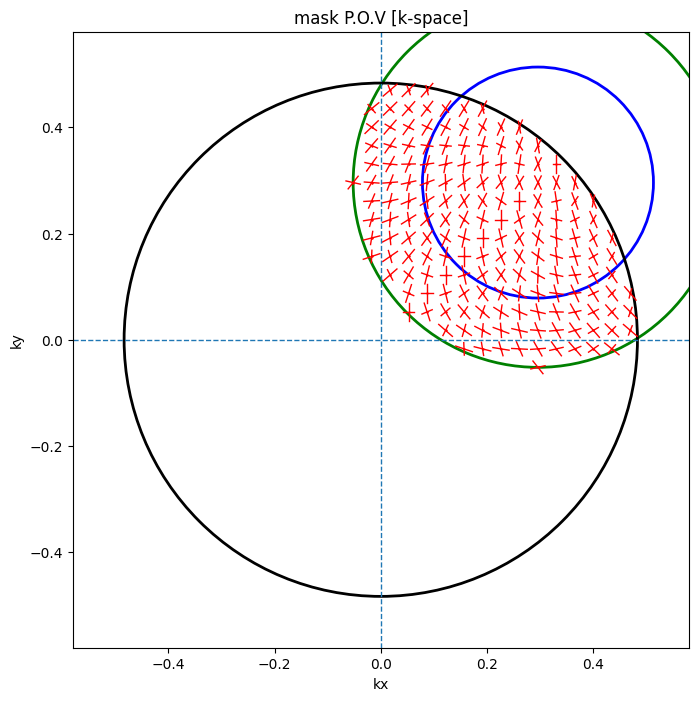

In [206]:
center_list, basis_list, magnitude_list = [],[],[]
R = c_matrix_to_ndarray(kspace.rotate_matrix_v1(chief_theta*degree, chief_phi*degree))
offset = np.array([*illum_center_k, 0])
for p in points:
    p = p + illum_center_k
    if np.linalg.norm(p) > k0: continue
    center_list.append(p)
    center_list.append(p)
    # sx, sy = [n/k_illum for n in p-illum_center_k]
    sx, sy = [n/k_propagating for n in p - illum_center_k]
    TE, TM, K = get_TE_TM([sx, sy])
    # TE -= offset
    # TM -= offset
    sx, sy = [n/k_propagating for n in p]
    R = c_matrix_to_ndarray(kspace.rotate_matrix_v1(*[n for n in kspace.sigma_xy_to_theta_phi(sx, sy)]))
    # R = np.transpose(R)
    # TE, TM
    # TE_x, TE_y, TE_z = R@TE
    # TM_x, TM_y, TM_z = R@TM
    TE = R@TE
    TM = R@TM
    # TE_amp = 1#np.linalg.norm(TE[:2])
    # TM_amp = 1#np.linalg.norm(TM[:2])
    # # print(TE_amp, TM_amp)
    # sx, sy = [n/k0 for n in p]
    # TE, TM, K = get_TE_TM([sx, sy])
    basis_list.append(np.array(TE))
    magnitude_list.append(TE_amp * sample_step*0.5)
    
    basis_list.append(np.array(TM))
    magnitude_list.append(TM_amp *sample_step*0.5)
plot_mask_pov()